In [2]:
import pandas as pd
import matplotlib.pyplot as plt

play_store = pd.read_csv('googleplaystore.csv')
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
play_store.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


In [4]:
#Split into categorical and numerical feats
categorical_feats = [i for i in play_store.columns if play_store[i].dtype == 'object']
numerical_feats = [i for i in play_store.columns if play_store[i].dtype == 'float64']

In [5]:
play_store[categorical_feats].isna().sum()

,0
App,0
Category,0
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0
Last Updated,0


In [6]:
play_store = play_store[categorical_feats].dropna()

In [7]:
play_store[categorical_feats].isna().sum()

,0
App,0
Category,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0
Last Updated,0


In [8]:
#Find the count of numbers in each column
play_store[categorical_feats].value_counts().head()

,,,,,,,,,,,,count
App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,
Nick,ENTERTAINMENT,123279,25M,"10,000,000+",Free,0,Everyone 10+,Entertainment;Music & Video,"January 24, 2018",2.0.8,4.4 and up,4
eBay: Buy & Sell this Summer - Discover Deals Now!,SHOPPING,2788923,Varies with device,"100,000,000+",Free,0,Teen,Shopping,"July 30, 2018",Varies with device,Varies with device,4
Skyscanner,TRAVEL_AND_LOCAL,481546,29M,"10,000,000+",Free,0,Everyone,Travel & Local,"August 6, 2018",5.48,4.4 and up,4
WatchESPN,SPORTS,288809,6.6M,"10,000,000+",Free,0,Everyone,Sports,"September 27, 2017",2.5.1,4.4 and up,4
"CBS Sports App - Scores, News, Stats & Watch Live",SPORTS,91031,Varies with device,"5,000,000+",Free,0,Everyone,Sports,"August 4, 2018",Varies with device,5.0 and up,4


In [9]:
apps = play_store['App'].value_counts()
apps

,count
App,
ROBLOX,9
"CBS Sports App - Scores, News, Stats & Watch Live",8
Candy Crush Saga,7
8 Ball Pool,7
ESPN,7
...,...
"Meet U - Get Friends for Snapchat, Kik & Instagram",1
U-Report,1
U of I Community Credit Union,1


In [10]:
apps = play_store['App'].value_counts().sum()
print(f"There are {apps} apps mentioned in this Data set.")

There are 10829 apps mentioned in this Data set.


In [11]:
(play_store['App'].value_counts() >= 6).sum()

16

In [12]:
#Take the downloads
downloads = play_store['Installs'].value_counts()
downloads

,count
Installs,
"1,000,000+",1578
"10,000,000+",1252
"100,000+",1169
"10,000+",1052
"1,000+",905
"5,000,000+",752
100+,718
"500,000+",538
"50,000+",478


In [13]:
play_store = play_store.drop_duplicates(subset='App')

# By Communication

In [14]:
apps_with_one_bil = play_store[play_store['Installs'] == '1,000,000,000+']
grouped_by_category = apps_with_one_bil.groupby('Category', as_index = True)
grouped_by_category.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,1433233,Varies with device,"1,000,000,000+",Free,0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,9642995,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4604324,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
341,Hangouts,COMMUNICATION,3419249,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
865,Google Play Games,ENTERTAINMENT,7165362,Varies with device,"1,000,000,000+",Free,0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device
1654,Subway Surfers,GAME,27722264,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
2544,Facebook,SOCIAL,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [15]:
communication_apps = grouped_by_category.get_group('COMMUNICATION')

In [16]:
communication_apps

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,9642995,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4604324,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
341,Hangouts,COMMUNICATION,3419249,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
391,Skype - free IM & video calls,COMMUNICATION,10484169,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device


In [17]:
height = communication_apps.Reviews.astype(int)
height.sort_values(ascending=False)

,Reviews
336,69119316
335,56642847
391,10484169
338,9642995
340,4604324
341,3419249


In [18]:
#Create a function that groups them by their category
def grouper(grouped_by_category, categ):
  return grouped_by_category.get_group(categ)


In [19]:
#For Book_apps
book_apps = grouper(grouped_by_category, 'BOOKS_AND_REFERENCE')
book_apps

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,1433233,Varies with device,"1,000,000,000+",Free,0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device


In [20]:
#For Video_players
video_apps = grouper(grouped_by_category, 'VIDEO_PLAYERS')
video_apps

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3665,YouTube,VIDEO_PLAYERS,25655305,Varies with device,"1,000,000,000+",Free,0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
3687,Google Play Movies & TV,VIDEO_PLAYERS,906384,Varies with device,"1,000,000,000+",Free,0,Teen,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device


In [21]:
#For Entertainment_apps
entertainment_apps = grouper(grouped_by_category, 'ENTERTAINMENT')
entertainment_apps

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
865,Google Play Games,ENTERTAINMENT,7165362,Varies with device,"1,000,000,000+",Free,0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device


In [22]:
#For Game_apps
game_apps = grouper(grouped_by_category, 'GAME')
game_apps

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1654,Subway Surfers,GAME,27722264,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up


In [23]:
grouped_by_category['Category'].value_counts()

,count
Category,
BOOKS_AND_REFERENCE,1
COMMUNICATION,6
ENTERTAINMENT,1
GAME,1
NEWS_AND_MAGAZINES,1
PHOTOGRAPHY,1
PRODUCTIVITY,1
SOCIAL,3
TOOLS,1


# Data Visualization

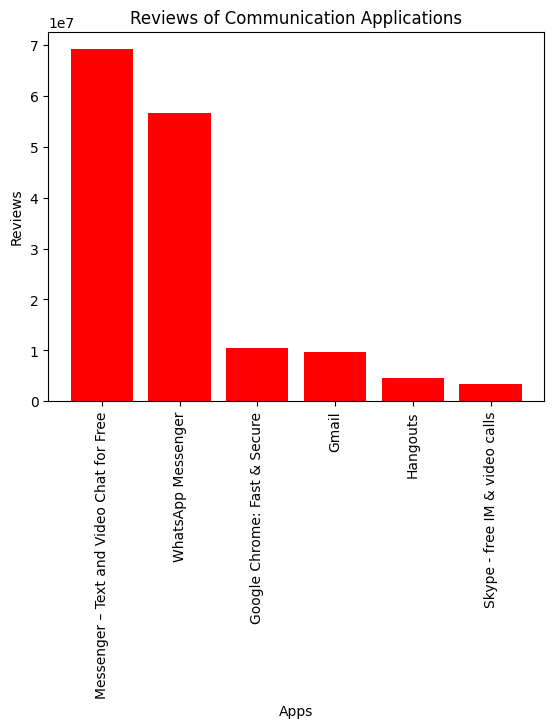

In [24]:
#Plot the values by reviews
plt.bar(x = communication_apps['App'], height = height.sort_values(ascending=False), color = 'red')
plt.xticks(rotation = 90)
plt.title('Reviews of Communication Applications')
plt.xlabel('Apps')
plt.ylabel('Reviews')
plt.show()

In [25]:
play_store

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [26]:
#We take the Installs Column and change it to int type
def converter(install_column):
  return int(install_column.replace(',', '').replace('+', ''))

play_store['Installs'] = play_store['Installs'].apply(converter)

In [27]:
play_store['Installs'].dtype

dtype('int64')

In [32]:
#Convert to date_time
play_store['Last Updated']= pd.to_datetime(play_store['Last Updated'])

In [47]:
import datetime as dt

freq_2018 = (play_store[play_store['Last Updated'].dt.year == 2018]).value_counts().sum()
print(f"There are {freq_2018} apps that were updated last 2018.")

There are 6279 apps that were updated last 2018


In [48]:
freq_others = (play_store[play_store['Last Updated'].dt.year != 2018]).value_counts().sum()
print(f"There are {freq_others} apps that were not updated last 2018.")

There are 3369 apps that were not updated last 2018.


In [60]:
categorical_feats = [i for i in play_store.columns if play_store[i].dtype == 'object']

In [61]:
print(categorical_feats)

['App', 'Category', 'Size', 'Type', 'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


In [62]:
print(numerical_feats)

['Installs', 'Reviews']


In [63]:
play_store['Reviews'].dtype

dtype('int64')

In [64]:
#Change reviews to int type
play_store['Reviews'] = play_store['Reviews'].astype(int)

In [65]:
numerical_feats = [i for i in play_store.columns if play_store[i].dtype == 'int64']

In [66]:
numerical_feats

['Reviews', 'Installs']

In [68]:
correlation = play_store[numerical_feats].corr()

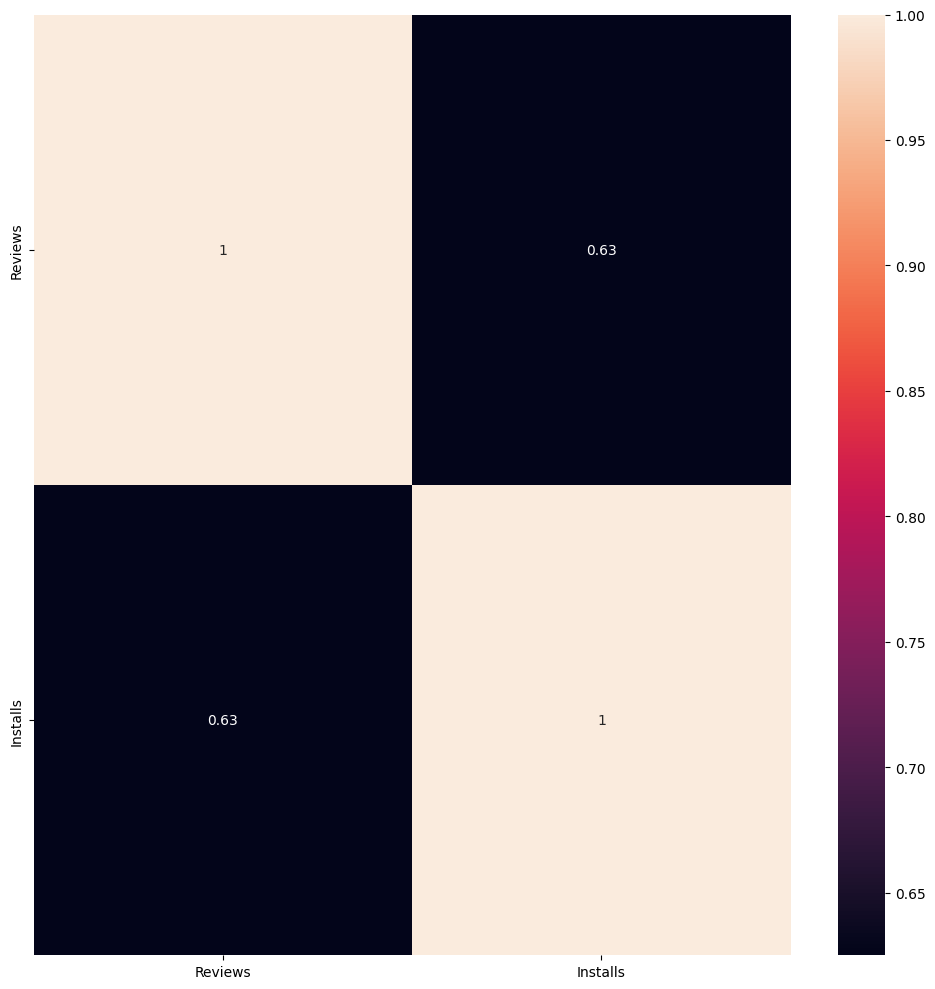

In [71]:
import seaborn as sns

figure = plt.figure(figsize= (10,10))
sns.heatmap(correlation, annot = True)
plt.tight_layout()
plt.show()


***We could interpret that both of these numerical features have a weak correlation***

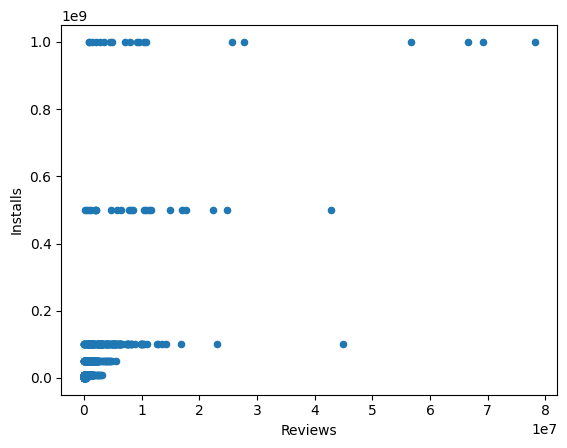

In [73]:
#Plot the Numerical Values
play_store.plot(kind= 'scatter', x='Reviews', y='Installs')
plt.show()

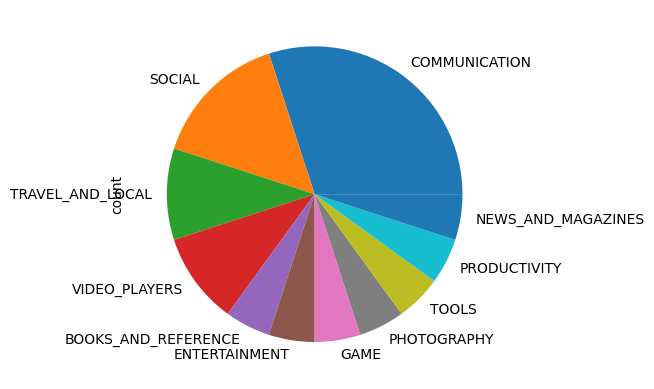

In [104]:
#plot each category values with over 1 billion installs

play_store[play_store['Installs']== 1000000000]['Category'].value_counts().plot(kind = 'pie', autopct = '')
plt.show()

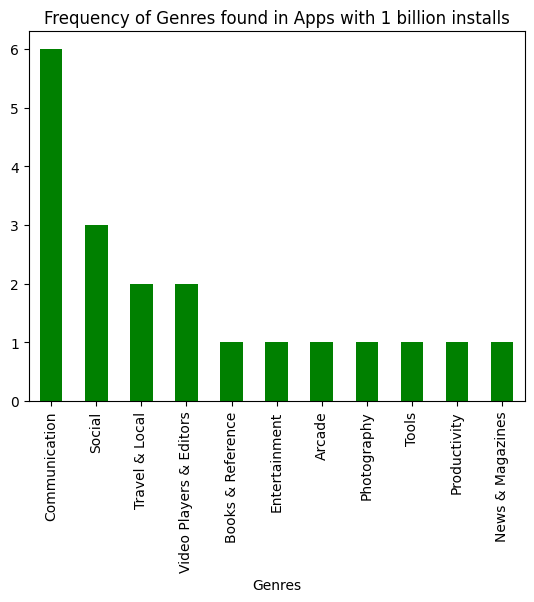

In [103]:
play_store[play_store['Installs']== 1000000000]['Genres'].value_counts().plot(kind='bar', color = 'green')
plt.title('Frequency of Genres found in Apps with 1 billion installs')
plt.show()